In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Trabajo/reto_precios.csv')
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

,main_name,subtitle,link,location,price,attributes,timestamp,id,address,since,description,vendor,lat,lon,price_mod,price_currency,since_period,since_value,days_on_site,amenities,age_in_years,bathrooms,cellars,num_floors,monthly_fee,apartments_per_floor,disposition,parking_lots,floor_situated,orientation,num_bedrooms,department_type,m2,final_price,price_square_meter
0,Departamento - Roma Norte,Departamento en venta,https://departamento.metroscubicos.com/MLM-139...,"Sinaloa 20 , Roma Sur, Roma Sur, Cuauhtémoc, D...",9000000 pesos,"127 m² construidos,2 recs.",2022-03-29,1,"Sinaloa 20 , Roma Sur",Publicado hace 5 días,Garden house con 2 habitaciones y dos baños c...,Investemx,19.421317,-99.164182,9000000.0,pesos,days,5,5.0,3.0,0.0,2.0,NaN,1.0,0 MXN,NaN,Contrafrente,2,NaN,NaN,2.0,NaN,127.0,9000000.0,70866.141732
1,Preventa Exclusiva · Terraloza Roma Norte ·,Departamento en venta,https://departamento.metroscubicos.com/MLM-139...,"Tonala, Roma Norte, Cuauhtémoc, Distrito Federal",4264000 pesos,"54 m² construidos,1 rec.",2022-03-29,2,Tonala,Publicado hace 7 días,Mezcla perfecta entre E S T I L O y C A L I D ...,Avitana,19.421029,-99.163541,4264000.0,pesos,days,7,7.0,2.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1.0,NaN,54.0,4264000.0,78962.962963
2,Townhouse Único En La Roma Sur,Departamento en venta,https://departamento.metroscubicos.com/MLM-139...,"Tepeji 43, Roma Sur, Ciudad De México, Cdmx, M...",8093500 pesos,"163 m² construidos,3 recs.",2022-03-29,3,"Tepeji 43, Roma Sur, Ciudad De México, Cdmx, M...",Publicado hace 4 días,"Concepto único en Roma Sur, es un desarrollo d...",Ebranuncios,19.407814,-99.161872,8093500.0,pesos,days,4,4.0,NaN,0.0,3.0,2.0,3.0,NaN,NaN,NaN,2,NaN,NaN,3.0,NaN,163.0,8093500.0,49653.374233
3,"Departamento En Roma Sur, Cuauhtémoc Con 2 Rec...",Departamento en venta,https://departamento.metroscubicos.com/MLM-132...,"Linares, Roma Sur, Cuauhtémoc, Distrito Federal",4000000 pesos,"93 m² construidos,2 recs.",2022-03-29,4,Linares,Publicado hace 5 meses por {action},[VEN] ID HM: 40395.En Houm hacemos todo más fá...,Houm,19.404992,-99.160243,4000000.0,pesos,months,5,150.0,2.0,0.0,2.0,NaN,NaN,853 MXN,NaN,NaN,1,NaN,Oeste,2.0,Loft,93.0,4000000.0,43010.752688
4,Últimos Deptos En Preventa En Roma Norte,Departamento en venta,https://departamento.metroscubicos.com/MLM-137...,"Frontera, Roma Norte, Cuauhtémoc, Distrito Fed...",6732700 pesos,"103 m² construidos,2 recs.",2022-03-29,5,Frontera,Publicado hace 52 días,"La mejor opción en Roma Norte, sólo 7 departam...",Contactobienesraicesgold,19.419693,-99.156036,6732700.0,pesos,days,52,52.0,4.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2.0,NaN,103.0,6732700.0,65366.019417


In [ ]:
distinct_count = df['age_in_years'].nunique()
distinct_count

1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   main_name             981 non-null    object 
 1   subtitle              981 non-null    object 
 2   link                  981 non-null    object 
 3   location              981 non-null    object 
 4   price                 981 non-null    object 
 5   attributes            981 non-null    object 
 6   timestamp             981 non-null    object 
 7   id                    981 non-null    int64  
 8   address               702 non-null    object 
 9   since                 981 non-null    object 
 10  description           981 non-null    object 
 11  vendor                981 non-null    object 
 12  lat                   981 non-null    float64
 13  lon                   981 non-null    float64
 14  price_mod             981 non-null    float64
 15  price_currency        9

In [ ]:
df.describe()

,id,lat,lon,price_mod,since_value,days_on_site,amenities,age_in_years,bathrooms,cellars,num_floors,apartments_per_floor,parking_lots,floor_situated,num_bedrooms,m2,final_price,price_square_meter
count,981.000000,981.000000,981.000000,9.810000e+02,981.000000,981.000000,504.000000,981.0,981.000000,52.000000,84.000000,15.000000,981.000000,24.000000,981.000000,981.000000,9.810000e+02,981.000000
mean,494.465851,19.654796,-99.222834,6.144620e+06,15.589195,103.478084,4.081349,0.0,1.970438,1.019231,3.607143,3.000000,1.331295,1.916667,2.103976,111.824608,6.144620e+06,61048.999248
std,284.137165,1.244009,0.608650,2.907089e+06,16.551510,116.789698,1.264019,0.0,0.887638,0.138675,2.789904,1.647509,0.481631,1.348644,0.627104,231.604294,2.907089e+06,19327.439701
min,1.000000,19.360533,-117.063962,6.342170e+05,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,6.342170e+05,582.246879
25%,250.000000,19.405824,-99.165172,4.330000e+06,3.000000,31.000000,4.000000,0.0,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,75.000000,4.330000e+06,52294.117647
50%,495.000000,19.411515,-99.163637,5.511689e+06,7.000000,59.000000,4.000000,0.0,2.000000,1.000000,3.000000,3.000000,1.000000,1.000000,2.000000,93.000000,5.511689e+06,61271.466667
75%,740.000000,19.419526,-99.161332,7.700000e+06,31.000000,120.000000,5.000000,0.0,2.000000,1.000000,5.000000,4.000000,2.000000,2.250000,2.000000,129.000000,7.700000e+06,70175.438596
max,985.000000,32.528726,-99.128642,2.233000e+07,59.000000,730.000000,8.000000,0.0,23.000000,2.000000,12.000000,7.000000,3.000000,5.000000,4.000000,7210.000000,2.233000e+07,150514.818182


<Axes: >

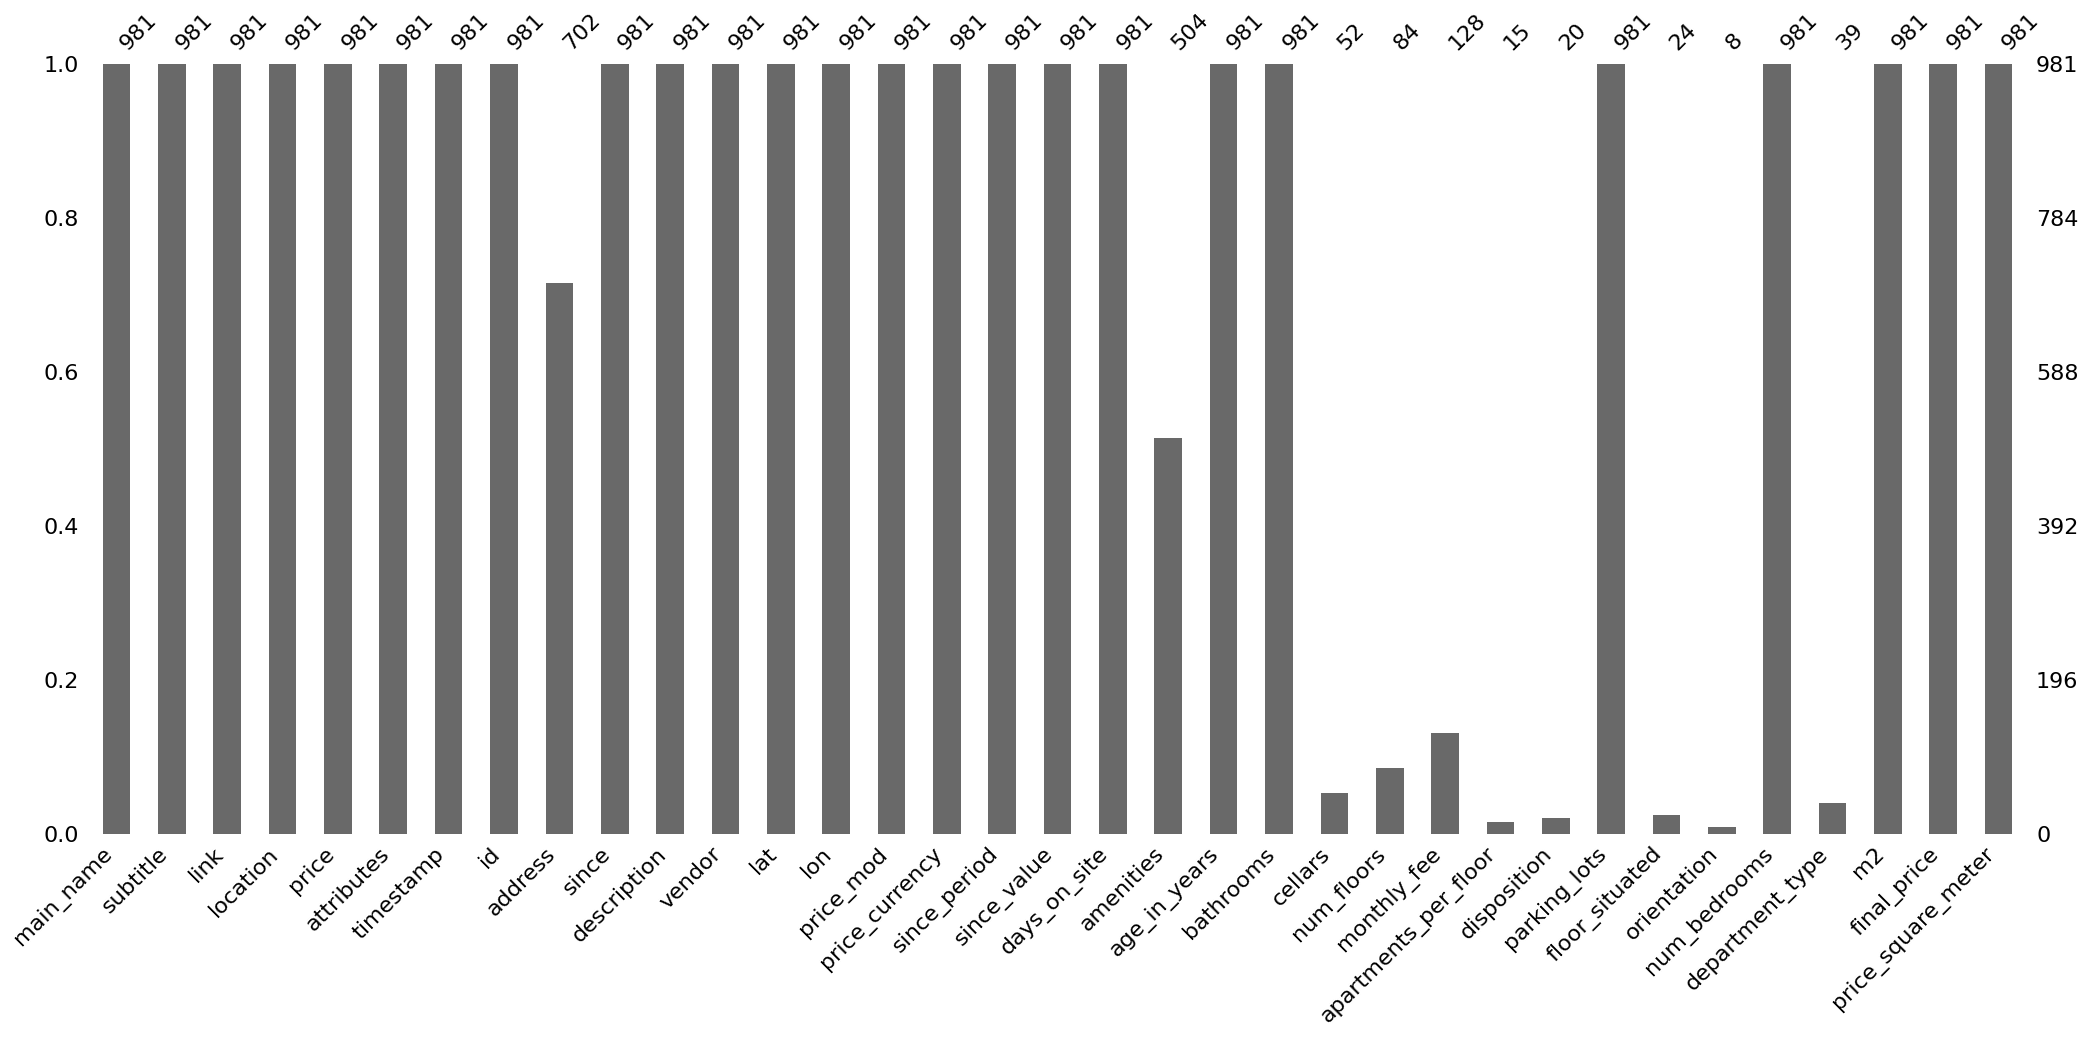

In [ ]:
msno.bar(df)

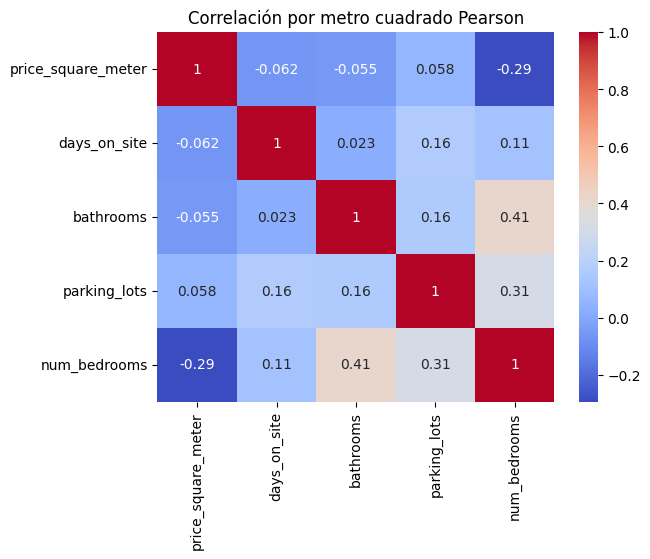

In [ ]:
# Crear una subselección del DataFrame solo con las columnas relevantes
subset_df = df[['price_square_meter','days_on_site','bathrooms','parking_lots','num_bedrooms']]

# Calcular la matriz de correlación
correlation_matrix = subset_df.corr(method='pearson')

# Crear un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación por metro cuadrado Pearson')
plt.show()

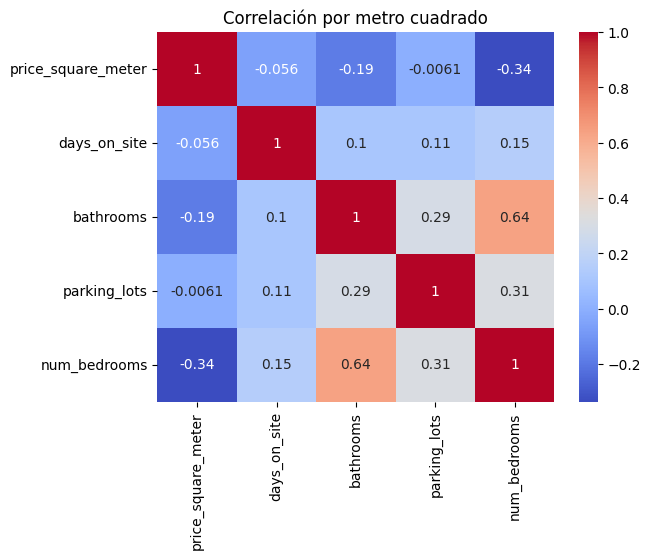

In [ ]:
# Crear una subselección del DataFrame solo con las columnas relevantes
subset_df = df[['price_square_meter','days_on_site','bathrooms','parking_lots','num_bedrooms']]

# Calcular la matriz de correlación
correlation_matrix = subset_df.corr(method='spearman')

# Crear un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación por metro cuadrado Spearman')
plt.show()



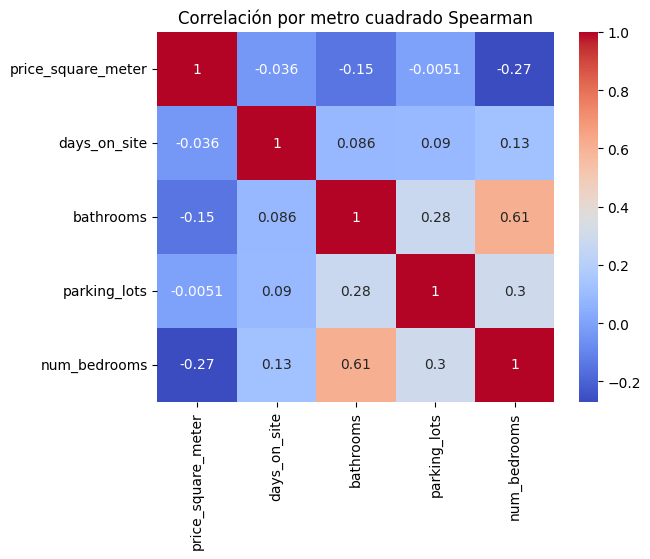

In [ ]:
# Crear una subselección del DataFrame solo con las columnas relevantes
subset_df = df[['price_square_meter','days_on_site','bathrooms','parking_lots','num_bedrooms']]

# Calcular la matriz de correlación
correlation_matrix = subset_df.corr(method='kendall')

# Crear un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación por metro cuadrado Spearman')
plt.show()

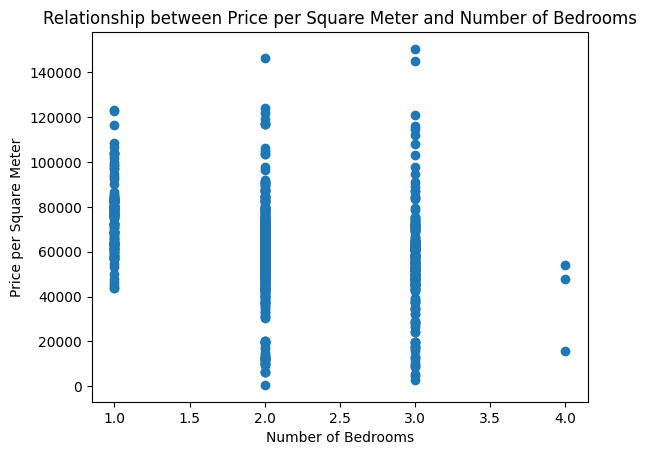

In [ ]:
# Select the columns of interest
columns_of_interest = ['price_square_meter', 'num_bedrooms']
selected_data = df[columns_of_interest]

# Plotting the data
x = selected_data['num_bedrooms']
y = selected_data['price_square_meter']

plt.scatter(x, y)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price per Square Meter')
plt.title('Relationship between Price per Square Meter and Number of Bedrooms')
plt.show()